In [3]:
import numpy as np 
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

df = pd.read_csv('Breast_cancer_dataset.csv')

# Check dataset shape
print("Dataset shape:", df.shape)

# Display column names
print("\nColumn names:")
print(df.columns.tolist())

# Display data types
print("\nData types:")
print(df.dtypes)

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

Dataset shape: (569, 33)

Column names:
['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32']

Data types:
id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean    

diagnosis
B    357
M    212
Name: count, dtype: int64


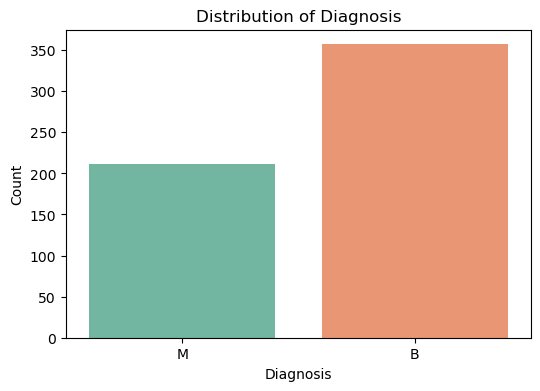

In [4]:
df = df.drop(columns = ['id','Unnamed: 32'])

# Check target variable distribution
print(df['diagnosis'].value_counts())

# Barplot for target variable
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='diagnosis', palette='Set2')
plt.title('Distribution of Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

In [5]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


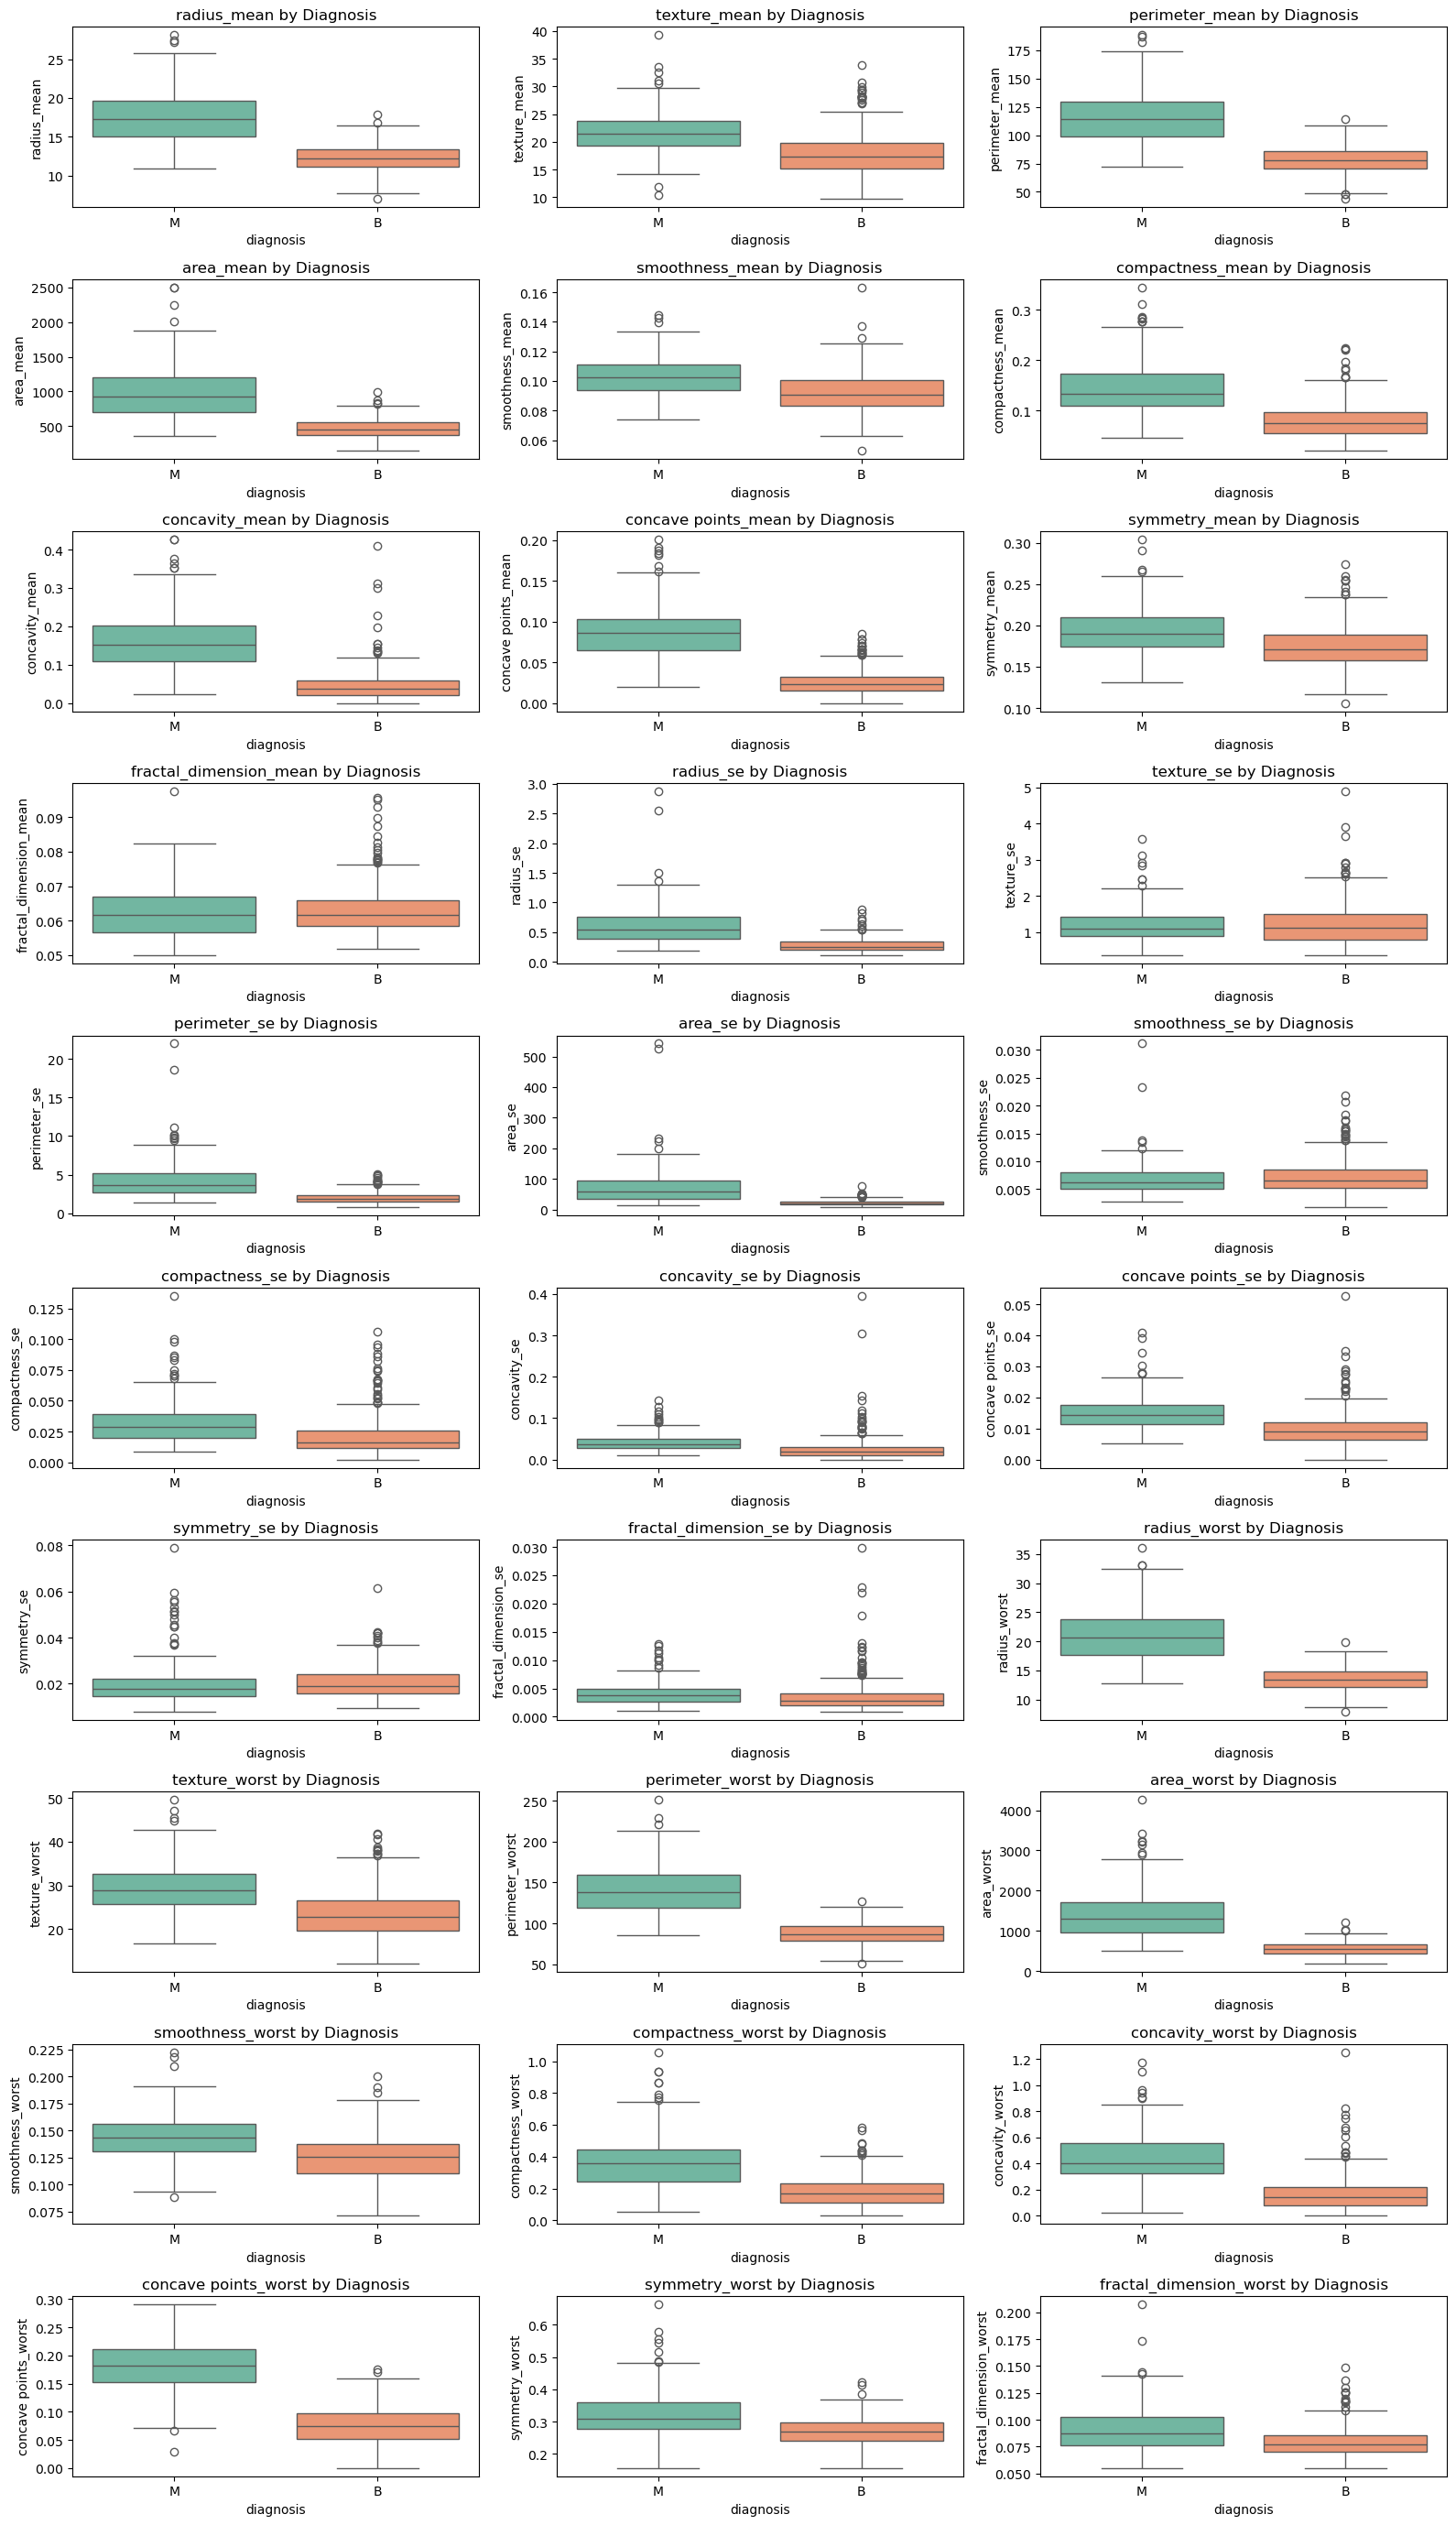

In [6]:
# 2. Select only numeric columns (excluding diagnosis)
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

# 3. Boxplots grouped by diagnosis
plt.figure(figsize=(16, 30))
for i, col in enumerate(num_cols, 1):
    plt.subplot((len(num_cols) // 3) + 1, 3, i)
    sns.boxplot(x='diagnosis', y=col, data=df, palette='Set2')
    plt.title(f'{col} by Diagnosis')
plt.tight_layout()
plt.show()

In [8]:
df['diagnosis_encoded'] = df['diagnosis'].map({'B': 0, 'M': 1})

df[['diagnosis', 'diagnosis_encoded']].head()

,diagnosis,diagnosis_encoded
0,M,1
1,M,1
2,M,1
3,M,1
4,M,1


The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


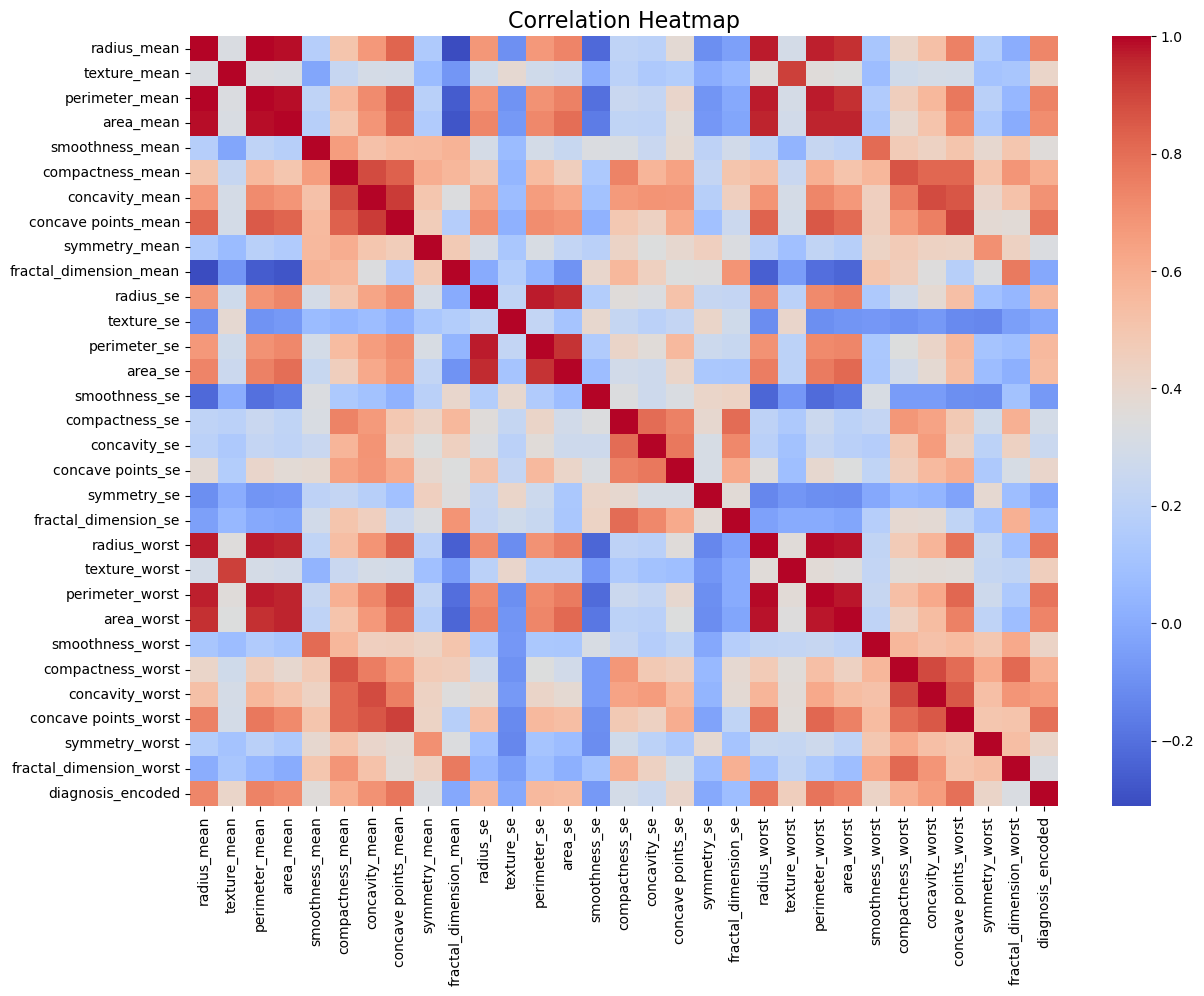

In [13]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(14, 10))
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import joblib

# Features and target
X = df.drop(['diagnosis', 'diagnosis_encoded'], axis=1)
y = df['diagnosis_encoded']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- PCA to retain 90% variance ---
pca = PCA(n_components=0.90, svd_solver='full')
X_pca = pca.fit_transform(X_scaled)

print(f"Original features: {X.shape[1]}, PCA components for 90% variance: {X_pca.shape[1]}")

# --- Combine scaler + PCA into a pipeline ---
preprocessor_pipeline = Pipeline(steps=[
    ("scaler", scaler),
    ("pca", pca)
])

# Fit the pipeline on X (optional, already done above)
preprocessor_pipeline.fit(X)


Original features: 30, PCA components for 90% variance: 7


,steps,"[('scaler', ...), ('pca', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_components,0.9
,copy,True
,whiten,False
,svd_solver,'full'


In [20]:
joblib.dump(preprocessor_pipeline, "preprocessor_pipeline.pkl")
print("Preprocessor pipeline saved as 'preprocessor_pipeline.pkl'")


Preprocessor pipeline saved as 'preprocessor_pipeline.pkl'


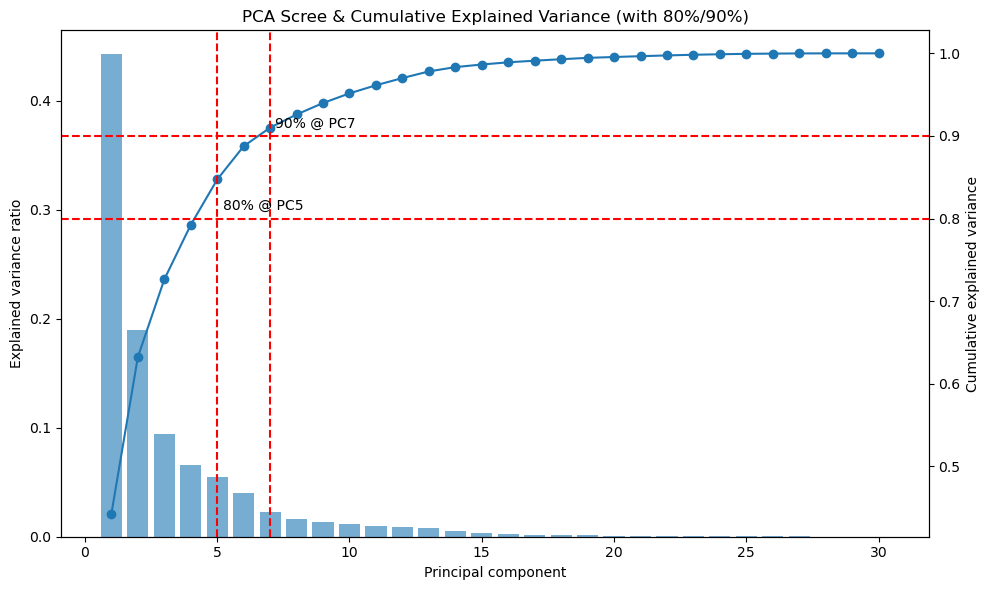

In [11]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# --- PCA on scaled features ---
pca = PCA(n_components=None, svd_solver="full")
X_pca = pca.fit_transform(X_scaled)

expl = pca.explained_variance_ratio_
cum_expl = np.cumsum(expl)

# Number of components for 80% and 90%
l80 = int(np.argmax(cum_expl >= 0.80) + 1)
l90 = int(np.argmax(cum_expl >= 0.90) + 1)

# --- Scree + cumulative variance chart ---
fig, ax1 = plt.subplots(figsize=(10, 6))

idx = np.arange(1, len(expl) + 1)
ax1.bar(idx, expl, alpha=0.6)
ax1.set_xlabel("Principal component")
ax1.set_ylabel("Explained variance ratio")

ax2 = ax1.twinx()
ax2.plot(idx, cum_expl, marker="o")
ax2.set_ylabel("Cumulative explained variance")

# 80% and 90% lines
for thr, k in [(0.80, l80), (0.90, l90)]:
    ax2.axhline(y=thr, linestyle="--", color="red")
    ax2.axvline(x=k, linestyle="--", color="red")
    ax2.text(k + 0.2, thr + 0.01, f"{int(thr*100)}% @ PC{k}")

plt.title("PCA Scree & Cumulative Explained Variance (with 80%/90%)")
plt.tight_layout()
plt.show()


Logistic Regression
Accuracy: 0.9736842105263158
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



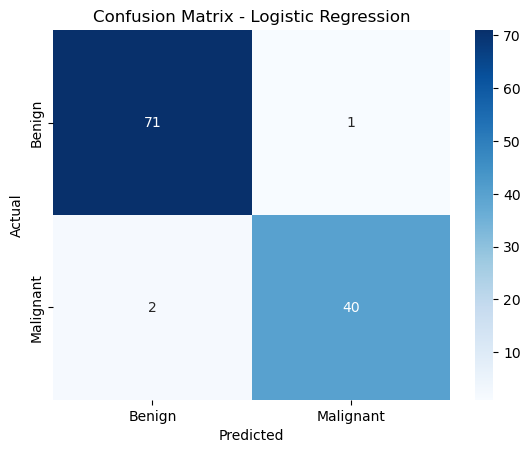


Random Forest
Accuracy: 0.9473684210526315
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        72
           1       0.95      0.90      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



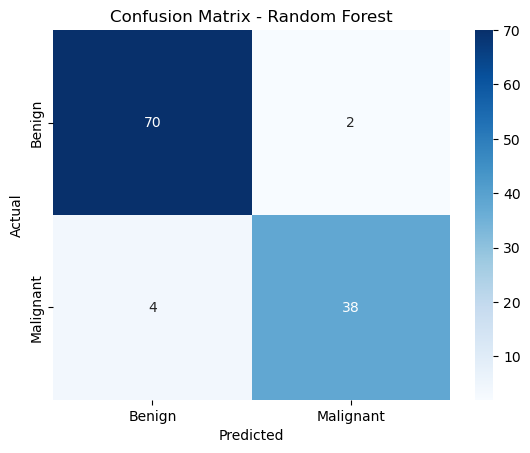


Linear SVM
Accuracy: 0.9736842105263158
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



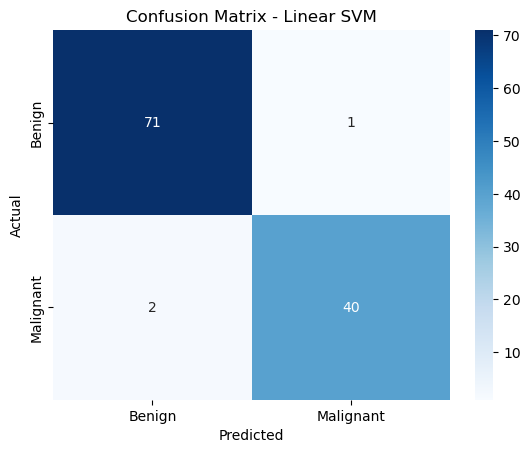

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# --- Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# --- Apply PCA (retain 90% variance) ---
pca_90 = PCA(n_components=l90)  # l90 from your PCA calculation earlier
X_train_pca = pca_90.fit_transform(X_train)
X_test_pca = pca_90.transform(X_test)

# --- Define models ---
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Linear SVM": SVC(kernel='linear', probability=True, random_state=42)
}

# --- Train and evaluate each model ---
for name, model in models.items():
    print(f"\n{name}")
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Benign", "Malignant"],
                yticklabels=["Benign", "Malignant"])
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import joblib

# Example preprocessor: scaling + PCA (if used during training)
from sklearn.decomposition import PCA

preprocessor = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=10))   # adjust to what you used (e.g. l90)
])

# Fit on training data
preprocessor.fit(X_train)

# Save it
joblib.dump(preprocessor, "preprocessor.pkl")


['preprocessor.pkl']


Tuning Logistic Regression ...
Best params for Logistic Regression: {'C': 9.51714306409916, 'penalty': 'l2', 'solver': 'lbfgs'}
Best CV score: 0.9714

Tuning Random Forest ...
Best params for Random Forest: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 148}
Best CV score: 0.9626

Tuning Linear SVM ...
Best params for Linear SVM: {'C': 2.0067378215835974, 'gamma': 'scale', 'kernel': 'rbf'}
Best CV score: 0.9714

Logistic Regression - Test Evaluation
Accuracy: 0.9736842105263158
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

ROC-AUC: 0.9966931216931216


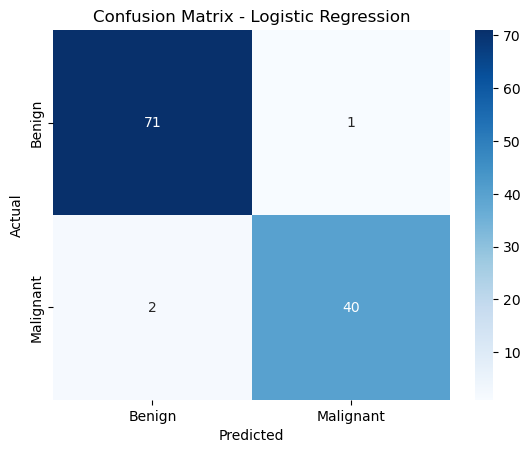

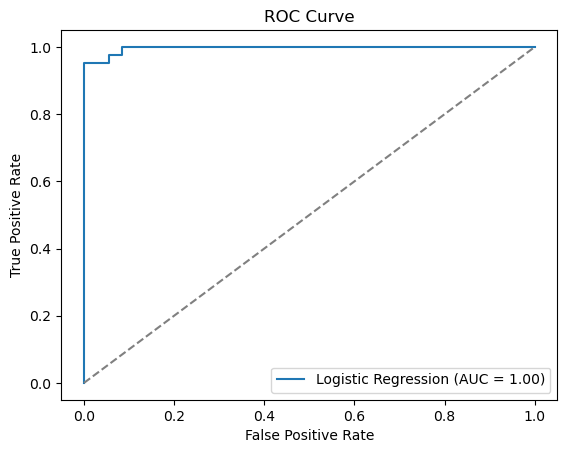


Random Forest - Test Evaluation
Accuracy: 0.9473684210526315
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        72
           1       0.95      0.90      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

ROC-AUC: 0.9890873015873016


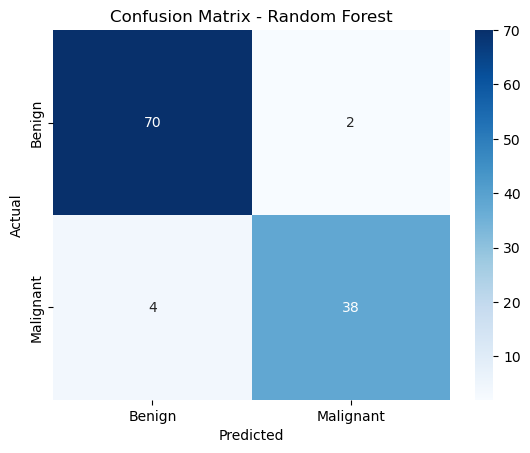

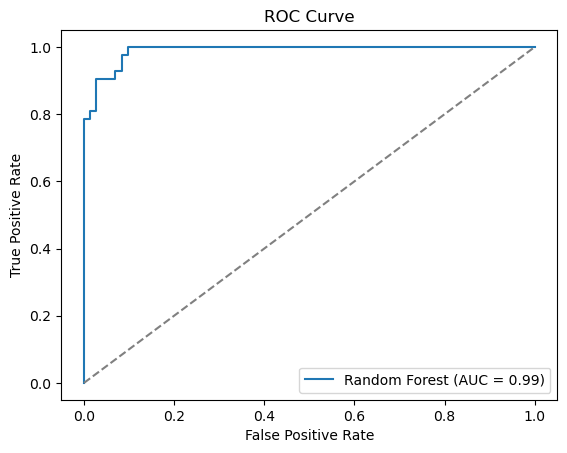


Linear SVM - Test Evaluation
Accuracy: 0.9649122807017544
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

ROC-AUC: 0.996031746031746


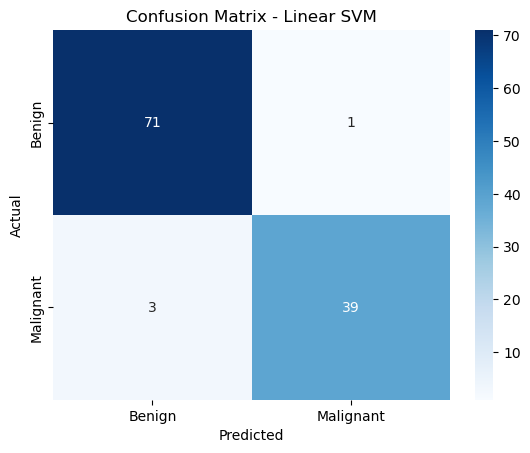

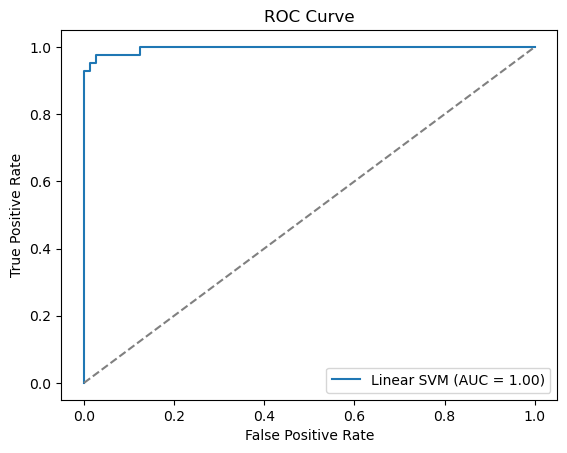

In [14]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from scipy.stats import uniform, randint

# --- Define parameter grids ---
param_grids = {
    "Logistic Regression": {
        "C": uniform(0.01, 10),       # regularization strength
        "penalty": ["l2"],            # only 'l2' works with lbfgs
        "solver": ["lbfgs"]
    },
    "Random Forest": {
        "n_estimators": randint(100, 500),
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": randint(2, 10),
        "min_samples_leaf": randint(1, 5),
        "max_features": ["sqrt", "log2", None]
    },
    "Linear SVM": {
        "C": uniform(0.01, 10),
        "kernel": ["linear", "rbf"],   # allow rbf too
        "gamma": ["scale", "auto"]
    }
}

# --- Define base models ---
base_models = {
    "Logistic Regression": LogisticRegression(max_iter=2000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Linear SVM": SVC(probability=True, random_state=42)
}

# --- CV strategy ---
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# --- Hyperparameter tuning ---
best_models = {}
for name, model in base_models.items():
    print(f"\nTuning {name} ...")
    search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_grids[name],
        n_iter=20,              # number of random configs to try
        scoring="accuracy",
        cv=cv,
        random_state=42,
        n_jobs=-1
    )
    search.fit(X_train_pca, y_train)
    
    print(f"Best params for {name}: {search.best_params_}")
    print(f"Best CV score: {search.best_score_:.4f}")
    
    # Save best model
    best_models[name] = search.best_estimator_

# --- Evaluate best models on test set ---
from sklearn.metrics import roc_auc_score, roc_curve

for name, model in best_models.items():
    print(f"\n{name} - Test Evaluation")
    y_pred = model.predict(X_test_pca)
    y_proba = model.predict_proba(X_test_pca)[:,1]
    
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, y_proba))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Benign", "Malignant"],
                yticklabels=["Benign", "Malignant"])
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, y_proba):.2f})")
    plt.plot([0,1],[0,1],"--",color="gray")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()


Insights:

Best Overall Model: Logistic Regression (highest test accuracy + ROC-AUC, very balanced precision/recall).

Best for Recall (catching malignant cases): Logistic Regression (0.95 vs 0.93 in SVM and 0.90 in RF).

Best for Interpretability: Random Forest (feature importances).

Most Balanced: SVM and Logistic Regression (both near-perfect AUC).

In [24]:
# ===========================================
# 1. Imports
# ===========================================
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import joblib

from flaml import AutoML

# ===========================================
# 2. Load Dataset
# ===========================================
df = pd.read_csv("Breast_cancer_dataset.csv")  # replace with your path

# Drop uninformative columns
df = df.drop(columns=['id', 'Unnamed: 32'], errors='ignore')

# Encode target
df['diagnosis_encoded'] = df['diagnosis'].map({'B': 0, 'M': 1})

X = df.drop(['diagnosis', 'diagnosis_encoded'], axis=1)
y = df['diagnosis_encoded']

# ===========================================
# 3. Train/Test Split
# ===========================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ===========================================
# 4. Preprocessing: Scaler + PCA
# ===========================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# PCA to retain 90% variance
pca = PCA(n_components=0.90, svd_solver='full')
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Save preprocessor pipeline for inference
preprocessor_pipeline = Pipeline(steps=[("scaler", scaler), ("pca", pca)])
joblib.dump(preprocessor_pipeline, "preprocessor_pipeline.pkl")
print("Preprocessor pipeline saved as 'preprocessor_pipeline.pkl'")

# ===========================================
# 5. FLAML AutoML Training
# ===========================================
automl = AutoML()

# Specify automl settings
automl_settings = {
    "time_budget": 60,  # seconds
    "metric": 'accuracy',
    "task": 'classification',
    "log_file_name": "flaml_log.log",
    "n_jobs": -1
}

print("Training FLAML AutoML model...")
automl.fit(X_train_pca, y_train, **automl_settings)

# ===========================================
# 6. Evaluate on Test Set
# ===========================================
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

y_pred = automl.predict(X_test_pca)
y_proba = automl.predict_proba(X_test_pca)[:, 1]

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

# ===========================================
# 7. Save Best Model
# ===========================================
best_model = automl.model
joblib.dump(best_model, "flaml_best_model.pkl")
print("Best FLAML model saved as 'flaml_best_model.pkl'")


Preprocessor pipeline saved as 'preprocessor_pipeline.pkl'
Training FLAML AutoML model...
[flaml.automl.logger: 08-25 18:11:28] {1752} INFO - task = classification
[flaml.automl.logger: 08-25 18:11:28] {1763} INFO - Evaluation method: cv
[flaml.automl.logger: 08-25 18:11:28] {1862} INFO - Minimizing error metric: 1-accuracy
[flaml.automl.logger: 08-25 18:11:28] {1979} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'sgd', 'catboost', 'lrl1']
[flaml.automl.logger: 08-25 18:11:28] {2282} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 08-25 18:11:28] {2417} INFO - Estimated sufficient time budget=675s. Estimated necessary time budget=17s.
[flaml.automl.logger: 08-25 18:11:28] {2466} INFO -  at 0.4s,	estimator lgbm's best error=0.1011,	best estimator lgbm's best error=0.1011
[flaml.automl.logger: 08-25 18:11:28] {2282} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 08-25 18:11:28] {2466} INFO -  at 0.4s,	es

STEP 2025-08-25 18:11:28,758 - No low-cost partial config given to the search algorithm. For cost-frugal search, consider providing low-cost values for cost-related hps via 'low_cost_partial_config'. More info can be found at https://microsoft.github.io/FLAML/docs/FAQ#about-low_cost_partial_config-in-tune


[flaml.automl.logger: 08-25 18:11:28] {2466} INFO -  at 0.5s,	estimator sgd's best error=0.0352,	best estimator sgd's best error=0.0352
[flaml.automl.logger: 08-25 18:11:28] {2282} INFO - iteration 9, current learner sgd
[flaml.automl.logger: 08-25 18:11:28] {2466} INFO -  at 0.6s,	estimator sgd's best error=0.0264,	best estimator sgd's best error=0.0264
[flaml.automl.logger: 08-25 18:11:28] {2282} INFO - iteration 10, current learner sgd
[flaml.automl.logger: 08-25 18:11:28] {2466} INFO -  at 0.7s,	estimator sgd's best error=0.0264,	best estimator sgd's best error=0.0264
[flaml.automl.logger: 08-25 18:11:28] {2282} INFO - iteration 11, current learner sgd
[flaml.automl.logger: 08-25 18:11:28] {2466} INFO -  at 0.7s,	estimator sgd's best error=0.0264,	best estimator sgd's best error=0.0264
[flaml.automl.logger: 08-25 18:11:28] {2282} INFO - iteration 12, current learner lgbm
[flaml.automl.logger: 08-25 18:11:28] {2466} INFO -  at 0.7s,	estimator lgbm's best error=0.0418,	best estimator

In [26]:
# ===========================================
# 1. Setup: Imports and Logging
# ===========================================
import pandas as pd
import numpy as np
import joblib
import logging
import unittest

# Logging setup
logging.basicConfig(level=logging.INFO, format="STEP %(asctime)s - %(message)s")

# ===========================================
# 2. Load Raw Data
# ===========================================
logging.info("1. Loading raw data...")
raw_data_path = "Breast_cancer_dataset.csv"  # <-- replace with your CSV path
df_raw = pd.read_csv(raw_data_path)
logging.info(f"Loaded raw data with shape: {df_raw.shape}")

# ===========================================
# 3. Manual Feature Engineering
# ===========================================
def manual_feature_engineering(df: pd.DataFrame) -> pd.DataFrame:
    """
    Drops uninformative columns to match training data.
    """
    df = df.copy()
    drop_cols = ["id", "Unnamed: 32"]
    for col in drop_cols:
        if col in df.columns:
            df = df.drop(columns=col)
    return df

logging.info("2. Applying manual feature engineering...")
df_fe = manual_feature_engineering(df_raw)
logging.info(f"Data shape after feature engineering: {df_fe.shape}")

# ===========================================
# 4. Load Saved Preprocessor Pipeline (Scaler + PCA)
# ===========================================
logging.info("3. Loading preprocessor pipeline...")
preprocessor = joblib.load("preprocessor_pipeline.pkl")
logging.info("Preprocessor pipeline loaded successfully.")

# ===========================================
# 5. Apply Preprocessing
# ===========================================
logging.info("4. Applying preprocessing pipeline...")
X_processed = preprocessor.transform(df_fe.drop(columns=["diagnosis"], errors="ignore"))
logging.info(f"Processed feature matrix shape: {X_processed.shape}")

# ===========================================
# 6. Load FLAML-Trained Best Model
# ===========================================
logging.info("5. Loading FLAML-trained model...")
best_model = joblib.load("flaml_best_model.pkl")
logging.info("Best model loaded successfully.")

# ===========================================
# 7. Run Batch Predictions
# ===========================================
logging.info("6. Running batch predictions...")
preds = best_model.predict(X_processed)
probs = best_model.predict_proba(X_processed)[:,1]  # Probability of malignancy

df_results = df_fe.copy()
df_results["Prediction"] = preds
df_results["Prediction_Prob"] = probs
logging.info("Predictions and probabilities added to dataframe.")

# ===========================================
# 8. Save Predictions
# ===========================================
logging.info("7. Saving predictions to file...")
df_results.to_csv("batch_predictions_with_prob.csv", index=False)
logging.info("Predictions saved successfully: batch_predictions_with_prob.csv")

# ===========================================
# 9. Summary Statistics
# ===========================================
logging.info("8. Prediction summary statistics:")
prediction_counts = df_results["Prediction"].value_counts()
prob_stats = df_results["Prediction_Prob"].describe()

print("Prediction counts (0=Benign, 1=Malignant):\n", prediction_counts)
print("\nPrediction probability statistics:\n", prob_stats)

# ===========================================
# 10. Unit Tests for Feature Engineering
# ===========================================
class TestFeatureEngineering(unittest.TestCase):
    def test_drop_columns(self):
        sample = pd.DataFrame({
            "id": [1,2],
            "radius_mean": [10,12],
            "Unnamed: 32": [np.nan, np.nan]
        })
        result = manual_feature_engineering(sample)
        self.assertNotIn("id", result.columns)
        self.assertNotIn("Unnamed: 32", result.columns)
        self.assertIn("radius_mean", result.columns)

suite = unittest.TestLoader().loadTestsFromTestCase(TestFeatureEngineering)
unittest.TextTestRunner().run(suite)

# ===========================================
# 11. Display Sample Predictions
# ===========================================
logging.info("9. Displaying sample predictions:")
df_results.head()


STEP 2025-08-25 18:16:47,716 - 1. Loading raw data...
STEP 2025-08-25 18:16:47,753 - Loaded raw data with shape: (569, 33)
STEP 2025-08-25 18:16:47,754 - 2. Applying manual feature engineering...
STEP 2025-08-25 18:16:47,763 - Data shape after feature engineering: (569, 31)
STEP 2025-08-25 18:16:47,763 - 3. Loading preprocessor pipeline...
STEP 2025-08-25 18:16:47,769 - Preprocessor pipeline loaded successfully.
STEP 2025-08-25 18:16:47,771 - 4. Applying preprocessing pipeline...
STEP 2025-08-25 18:16:47,791 - Processed feature matrix shape: (569, 7)
STEP 2025-08-25 18:16:47,792 - 5. Loading FLAML-trained model...
STEP 2025-08-25 18:16:47,796 - Best model loaded successfully.
STEP 2025-08-25 18:16:47,796 - 6. Running batch predictions...
STEP 2025-08-25 18:16:47,803 - Predictions and probabilities added to dataframe.
STEP 2025-08-25 18:16:47,804 - 7. Saving predictions to file...
STEP 2025-08-25 18:16:47,815 - Predictions saved successfully: batch_predictions_with_prob.csv
STEP 2025-08

Prediction counts (0=Benign, 1=Malignant):
 Prediction
0    360
1    209
Name: count, dtype: int64

Prediction probability statistics:
 count    569.000000
mean       0.367377
std        0.452300
min        0.000024
25%        0.001221
50%        0.022300
75%        0.981968
max        0.999960
Name: Prediction_Prob, dtype: float64


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Prediction,Prediction_Prob
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1,0.997531
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1,0.998845
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1,0.999801
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1,0.846769
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1,0.994284


STEP 2025-08-25 18:17:15,509 - 10. True labels detected. Calculating evaluation metrics...
STEP 2025-08-25 18:17:15,527 - Accuracy: 0.9807


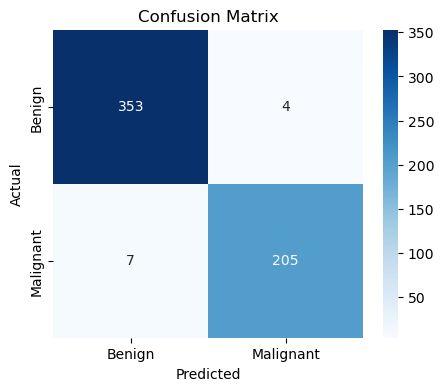

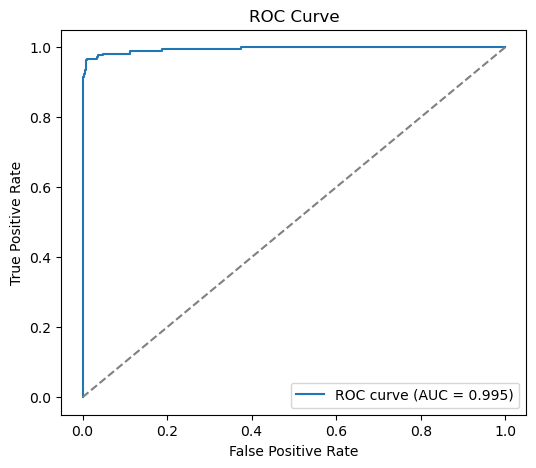

In [27]:
# ===========================================
# 12. Evaluation (if true labels exist)
# ===========================================
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score

if "diagnosis" in df_results.columns:
    logging.info("10. True labels detected. Calculating evaluation metrics...")

    # Encode diagnosis for evaluation
    y_true = df_results['diagnosis'].map({'B': 0, 'M': 1}).values
    y_pred = df_results['Prediction'].values
    y_prob = df_results['Prediction_Prob'].values

    # --- Accuracy ---
    acc = accuracy_score(y_true, y_pred)
    logging.info(f"Accuracy: {acc:.4f}")

    # --- Confusion Matrix ---
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Benign", "Malignant"],
                yticklabels=["Benign", "Malignant"])
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # --- ROC Curve ---
    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    auc_score = roc_auc_score(y_true, y_prob)
    plt.figure(figsize=(6,5))
    plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc_score:.3f})")
    plt.plot([0,1], [0,1], linestyle='--', color='gray')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()

else:
    logging.info("10. True labels not available. Skipping evaluation metrics.")
